# Análisis de Correlación: P-valores y Corrección de Bonferroni

En este notebook aprenderemos a evaluar no solo qué tanto se relacionan dos variables, sino qué tan **confiable** es esa relación estadísticamente.

## 1. Conceptos Clave

* **Coeficiente de Correlación (r):** Mide la fuerza y dirección de la relación (de -1 a 1).
* **P-valor (Valor de significancia):** Nos dice la probabilidad de que la correlación observada haya ocurrido por puro azar. Generalmente, si $p < 0.05$, decimos que es significativa.
* **El Problema de las Comparaciones Múltiples:** Si calculas muchas correlaciones a la vez, aumenta la probabilidad de encontrar un "falso positivo" (Error Tipo I).
* **Corrección de Bonferroni:** Es un ajuste conservador donde dividimos nuestro nivel de significancia ($\alpha$) entre el número de comparaciones ($n$).
    * Nuevo $\alpha$ ajustado: $\alpha_{adj} = \frac{\alpha}{n}$

---

## 2. Implementación en Python

Utilizaremos `scipy.stats` para calcular los p-valores, ya que Pandas por defecto solo entrega los coeficientes $r$.

<Axes: >

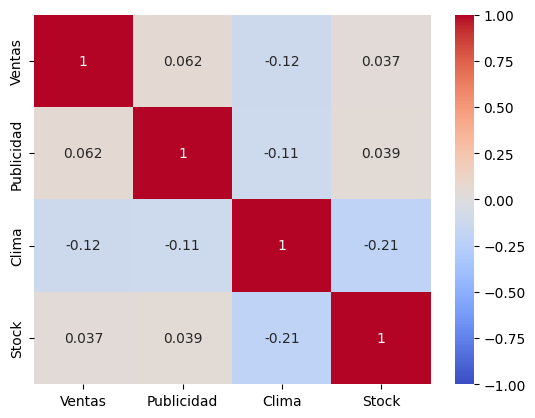

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Creamos un dataset de ejemplo
np.random.seed(42)
data = pd.DataFrame({
    'Ventas': np.random.rand(50),
    'Publicidad': np.random.rand(50),
    'Clima': np.random.rand(50),
    'Stock': np.random.rand(50)
})

def calculate_pvalues(df):
    """
    Calcula una matriz de p-valores para un DataFrame.
    """
    df_cols = pd.DataFrame(columns=df.columns)
    pvalues = df_cols.transpose().join(df_cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if r == c:
                pvalues.loc[r,c] = 1.0
            else:
                # pearsonr devuelve (coeficiente_r, p_valor)
                pvalues.loc[r,c] = pearsonr(df[r], df[c])[1]
    return pvalues.astype(float)

# 2. Obtener matrices
corr_matrix = data.corr()
p_matrix = calculate_pvalues(data)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## 3. Aplicando la Corrección de Bonferroni

Cuando realizamos múltiples pruebas de hipótesis simultáneamente, la probabilidad de cometer al menos un **Error Tipo I** (falso positivo) aumenta. La corrección de Bonferroni compensa este riesgo ajustando el umbral de significancia.

Si tenemos $k$ variables, el número de comparaciones únicas (pares) es:
$n = \frac{k(k-1)}{2}$

En nuestro ejemplo con 4 variables: $n = \frac{4(4-1)}{2} = 6$.

El nuevo **Alpha Ajustado** será:
$$\alpha_{bonferroni} = \frac{\alpha_{original}}{n}$$

Alpha original: 0.05
Alpha ajustado (Bonferroni): 0.0083


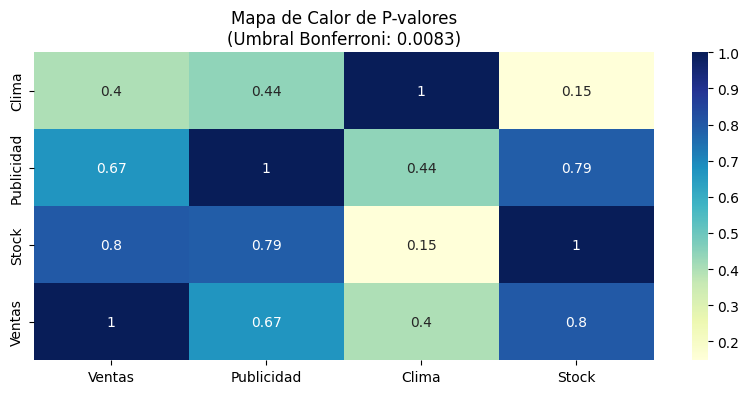

In [3]:
# Definir nivel de significancia inicial
alpha_inicial = 0.05
num_comparaciones = 6 # Para 4 variables

alpha_bonferroni = alpha_inicial / num_comparaciones

print(f"Alpha original: {alpha_inicial}")
print(f"Alpha ajustado (Bonferroni): {alpha_bonferroni:.4f}")

# 4. Visualización de resultados significativos
# Solo marcamos como True aquellas que pasan la prueba de Bonferroni
significativas = p_matrix < alpha_bonferroni

plt.figure(figsize=(10, 4))
sns.heatmap(p_matrix, annot=True, cmap='YlGnBu')
plt.title(f"Mapa de Calor de P-valores\n(Umbral Bonferroni: {alpha_bonferroni:.4f})")
plt.show()